Last Updated: 7-25-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-Structures" data-toc-modified-id="Data-Structures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Structures</a></div><div class="lev2 toc-item"><a href="#GeoSeries" data-toc-modified-id="GeoSeries-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>GeoSeries</a></div><div class="lev3 toc-item"><a href="#Attributes" data-toc-modified-id="Attributes-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Attributes</a></div><div class="lev3 toc-item"><a href="#Basic-Methods" data-toc-modified-id="Basic-Methods-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Basic Methods</a></div><div class="lev3 toc-item"><a href="#Relationship-Tests" data-toc-modified-id="Relationship-Tests-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Relationship Tests</a></div><div class="lev2 toc-item"><a href="#GeoDataFrame" data-toc-modified-id="GeoDataFrame-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>GeoDataFrame</a></div>

# Data Structures

GeoPandas implements two main data structures:
- ```GeoSeries```
- ```GeoDataFrame```

These are subclasses of pandas ```Series``` and ```DataFrame```, respectively.

## GeoSeries

- It is a vector where each entry in the vector is a set of shapes corresponding to one observation.
- An entry may constist of:
    - only one shape:
        - e.g: single polygon
    - multiple shapes that are meant to be thought of as one observation:
        - many polygons that make up the State of Hawaii.
        
        
    

**geopandas** has three basic classes of geometric objects(Shapely objects):

    - Points/ Multi-Points
    - Lines/ Multilines
    - Polygons/Multi-Polygeons
    
**NOTE:**
- All entries in a ```GeoSeries``` need not be of the same geometric type, although certain export operations will fail if this is not the case.

### Attributes

- ```area```: shape area (units of projection)
- ```bounds```: tuple of max and min coordinates on each axis for each shape.
- ```total_bounds```: tuple of max and min coordinates on each axis for entire GeoSeries.
- ```geom_type```: type of geometry
- ```is_valid```: tests if coordinates make a shape that is reasonable geometric shape.

### Basic Methods

- ```distance(other)```: returns ```Series``` with minimum distance from each entry to ```other```.
- ```centroid```: returns ```GeoSeries``` of centroids.
- ```representative_point()```: returns ```GeoSeries``` of points that are guaranteed to be within each geometry.
- ```to_crs()```: change coordinate reference system.
- ```plot()```: plot ```GeoSeries```

### Relationship Tests

- ```geom_almost_equals(other)```: is shape almost the same as ```other```(good when floating point precision issues make shapes slightly different)
- ```contains(other)```: is shape contained within ```other```
- ```intersects(other)```: does shape intersect ```other```

## GeoDataFrame

- A ```GeoDataFrame``` is tabular data structure that contains a ```GeoSeries```.
- The most important property of a ```GeoDataFrame``` is that it always has one ```GeoSeries``` column that holds a special status. This ```GeoSeries``` is referred to as the ```GeoDataFrame```'s "geometry".

- When a spatial method is applied to a ```GeoDataFrame``` such as area, this command will always act on the "geometry" column.

- The "geometry" column - no matter its name - can be accessed through the ```geometry``` attribute (```gdf.geometry```), and the name of the ```geometry``` column can be found by typing ```gdf.geometry.name```.

- A ```GeoDataFrame``` may also contain other columns with geometrical(shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the ```set_geometry``` method.

In [6]:
import geopandas as gpd
%matplotlib inline

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [4]:
world.geometry

0      POLYGON ((61.21081709172574 35.65007233330923,...
1      (POLYGON ((16.32652835456705 -5.87747039146621...
2      POLYGON ((20.59024743010491 41.85540416113361,...
3      POLYGON ((51.57951867046327 24.24549713795111,...
4      (POLYGON ((-65.50000000000003 -55.199999999999...
5      POLYGON ((43.58274580259273 41.09214325618257,...
6      (POLYGON ((-59.57209469261153 -80.040178725096...
7      POLYGON ((68.935 -48.62500000000001, 69.58 -48...
8      (POLYGON ((145.3979781434948 -40.7925485166058...
9      POLYGON ((16.97966678230404 48.12349701597631,...
10     (POLYGON ((45.0019873390568 39.7400035670496, ...
11     POLYGON ((29.33999759290035 -4.499983412294092...
12     POLYGON ((3.314971144228537 51.34578095153609,...
13     POLYGON ((2.691701694356254 6.258817246928629,...
14     POLYGON ((-2.827496303712707 9.642460842319778...
15     POLYGON ((92.67272098182556 22.04123891854125,...
16     POLYGON ((22.65714969248299 44.23492300066128,...
17     (POLYGON ((-77.534659999

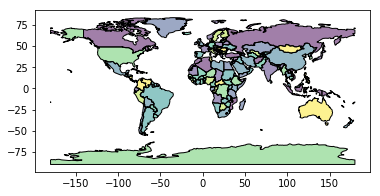

In [7]:
world.plot();

In [8]:
world.geometry.name

'geometry'

In [9]:
world.area

0        63.593500
1       103.599439
2         3.185163
3         7.095047
4       278.923392
5         3.030560
6      6028.836194
7         1.432928
8       695.545501
9        10.179604
10        9.642786
11        2.135367
12        3.830007
13        9.641193
14       22.574625
15       11.857175
16       12.119548
17        1.399757
18        5.696667
19       28.301182
20        1.872603
21       92.077173
22      710.185243
23        0.872053
24        3.594123
25       51.837670
26       50.861076
27     1712.995228
28        5.440201
29       86.508469
          ...     
147       8.604722
148      11.751504
149       5.753425
150       2.225310
151      79.446214
152       1.639983
153      18.293965
154     107.167364
155       5.007220
156      42.941255
157      14.272461
158      50.073501
159       1.208939
160       0.639000
161      15.285952
162      83.154637
163       3.043213
164      76.301992
165      19.976559
166      73.965229
167      17.027171
168    1122.

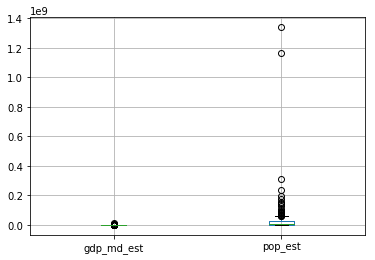

In [12]:
world.boxplot()

In [13]:
world.centroid

0        POINT (66.08669022192834 33.85639928169076)
1       POINT (17.47057255231345 -12.24586903613316)
2        POINT (20.03242643144321 41.14135330604877)
3        POINT (54.20671476159633 23.86863365334761)
4      POINT (-65.17536077114174 -35.44682148949509)
5        POINT (45.00029001101479 40.21660761230144)
6       POINT (20.57100056984261 -80.49198288284349)
7       POINT (69.53158047042371 -49.30645491167198)
8        POINT (134.502775475366 -25.73065477972607)
9        POINT (14.07615888433708 47.61394879274629)
10       POINT (47.55390958999187 40.22069060359235)
11      POINT (29.91390089307105 -3.377391812428584)
12       POINT (4.580831590651701 50.65244260645211)
13        POINT (2.33737755349616 9.647430780663713)
14       POINT (-1.77653745205594 12.31165049413671)
15       POINT (90.26792827719598 23.83946179534406)
16       POINT (25.19511095327711 42.75311876202169)
17      POINT (-77.92997080393509 25.51549172533655)
18       POINT (17.81688342129799 44.180767841

In [16]:
world.quantile()

gdp_md_est      43270.0
pop_est       9035536.0
Name: 0.5, dtype: float64

In [26]:
from shapely.geometry import Point

In [27]:
a = Point(125, -9)

In [30]:
b = world.contains(a)

In [31]:
b.describe()

count       177
unique        2
top       False
freq        176
dtype: object

In [32]:
b.unique()

array([False,  True], dtype=bool)